# Notebook 2: Reading Data

Welcome! The main goal of this notebook is to read the Cubeset data and explore its characteristics.

---

#### Importing libraries

In [1]:
import matplotlib.pyplot as plt  # Importing Matplotlib for creating visualizations and plots.
import random  # Importing the 'random' module for generating random numbers and making random selections.
import numpy as np  # Importing NumPy, a library for numerical operations, used here for handling and manipulating image data arrays.

---

### Reading the data from **Numpy**

In the `data` folder, you will find three types of datasets, each saved as numpy files along with their corresponding label files. These datasets are organized as follows:

1.	`train_images.npy`: Contains images used for **training** machine and deep learning models. The associated labels are stored in train_labels.npy.
2.	`val_images.npy`: Contains images used for **validating** the trained models. The corresponding labels are stored in val_labels.npy.
3.	`test_images.npy`: Contains images used for **testing** the trained models. The associated labels are stored in test_labels.npy.

Let’s now read and explore these datasets.

In [2]:
import numpy as np

# Load the datasets
train_images = np.load('data/train_images.npy')
train_labels = np.load('data/train_labels.npy')
val_images = np.load('data/val_images.npy')
val_labels = np.load('data/val_labels.npy')
test_images = np.load('data/test_images.npy')
test_labels = np.load('data/test_labels.npy')

# Print basic information about each dataset
print(f"Training images: {train_images.shape}, Training labels: {train_labels.shape}")
print(f"Validation images: {val_images.shape}, Validation labels: {val_labels.shape}")
print(f"Testing images: {test_images.shape}, Testing labels: {test_labels.shape}")


Training images: (9711, 512, 512, 3), Training labels: (9711,)
Validation images: (3237, 512, 512, 3), Validation labels: (3237,)
Testing images: (3237, 512, 512, 3), Testing labels: (3237,)


- The training dataset consists of 9,711 samples of 512x512 RGB images, while the validation and testing sets each contain 3,237 samples.

---

### Visualising the data

The dataset we will be working with contains five classes, described as follows:
- **Blurry**: Data captured while the satellite is in motion, resulting in blurred images.
- **Corrupt**: Images with defects from improper camera priming or stray light.
- **Missing Data**: Images with partial or complete data loss.
- **Noisy**: Images over-saturated with noise from radiation or other sources.
- **Priority**: Clear images suitable for scientific analysis on the ground.

Now, Let’s take a look at these datasets.

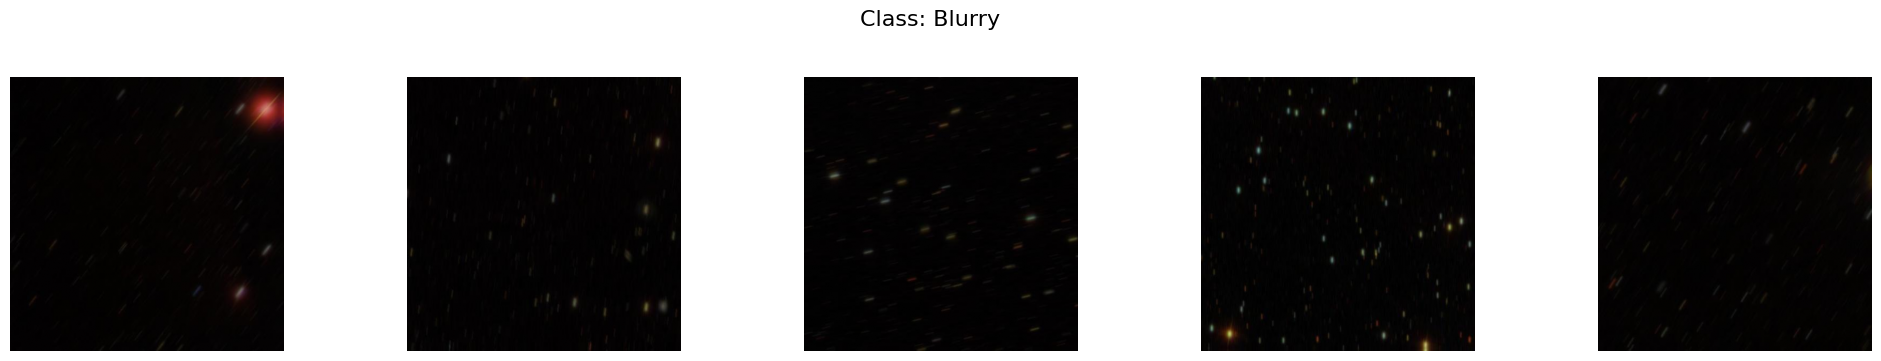

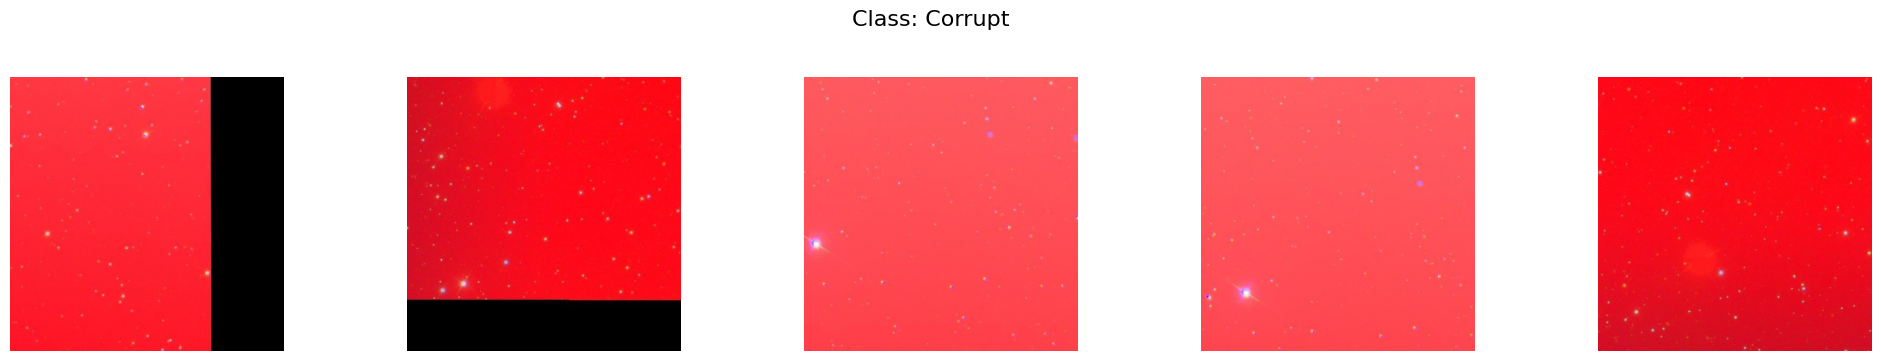

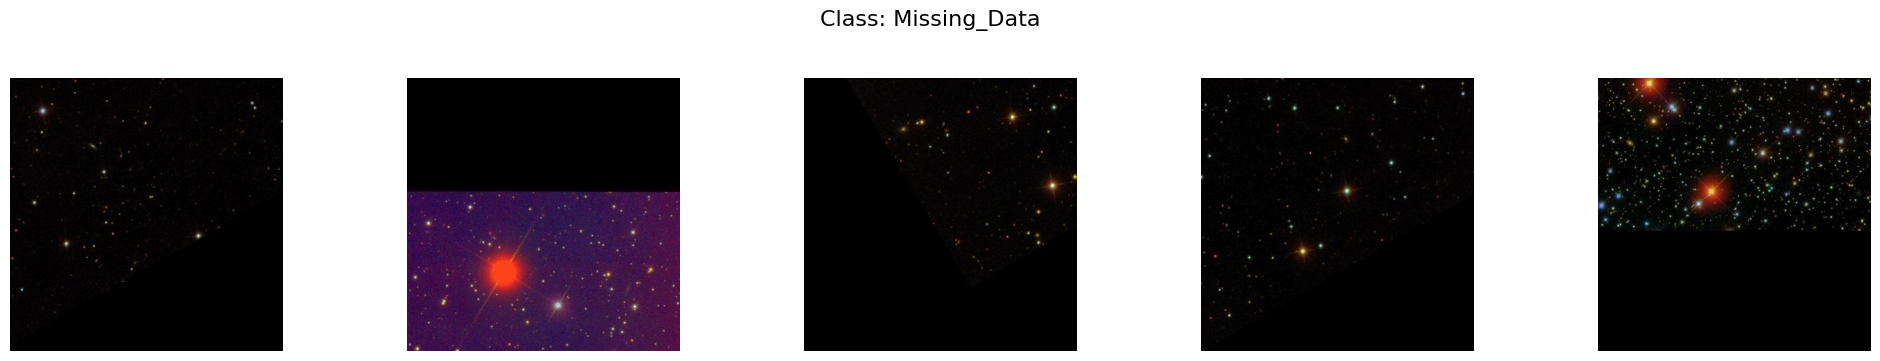

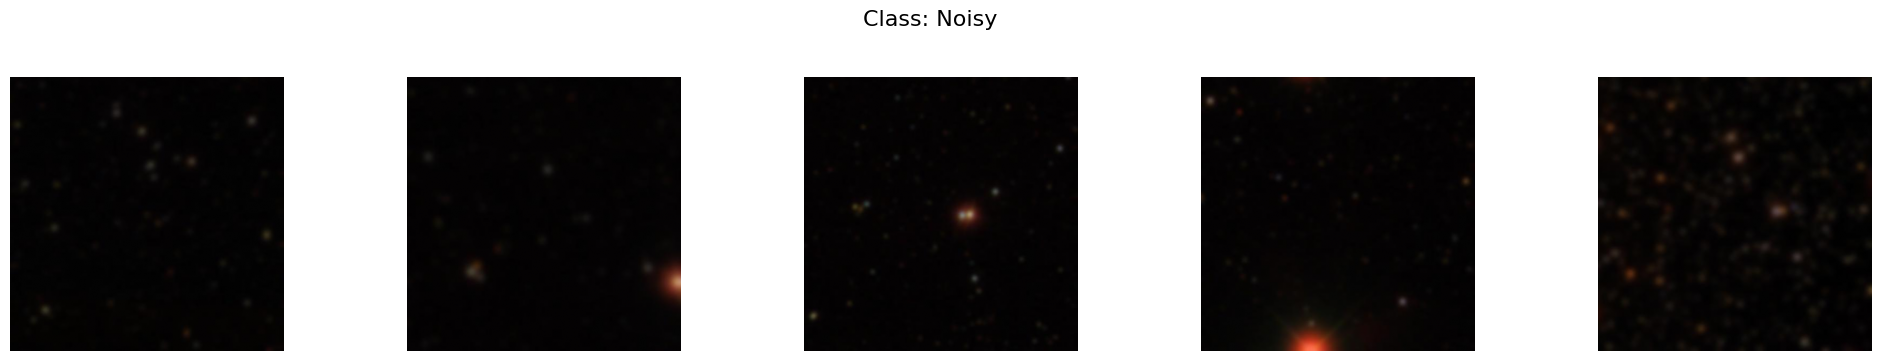

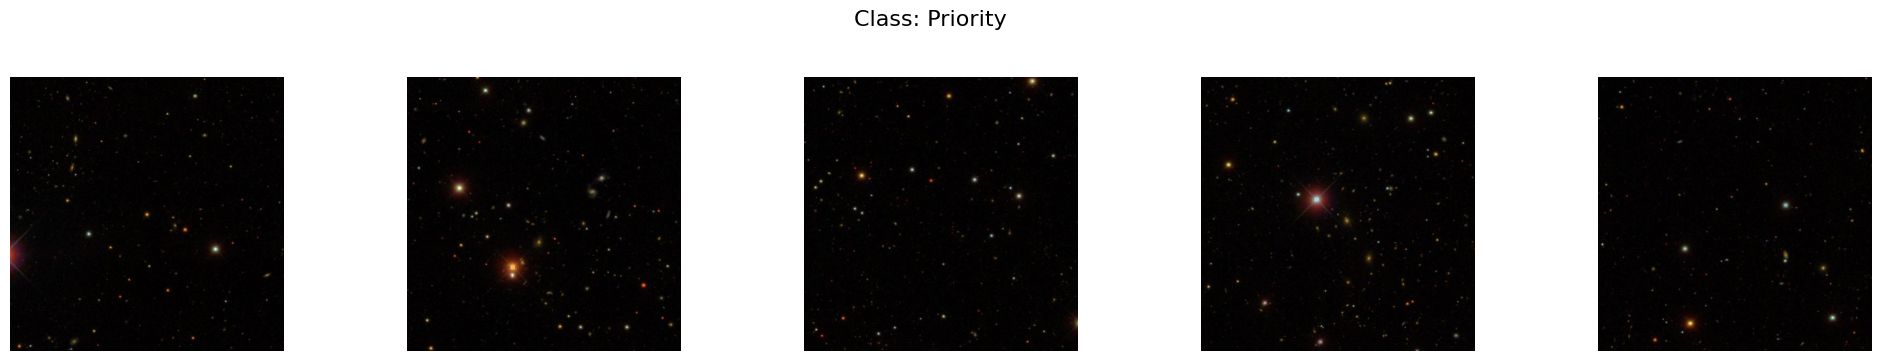

In [3]:
# Define the class names
class_names = ["Blurry", "Corrupt", "Missing_Data", "Noisy", "Priority"]

# Get the unique labels in the training set
unique_labels = np.unique(train_labels)


# Display the first 5 images for each class
for label in unique_labels:
    # Find the indices of images belonging to the current class
    class_indices = np.where(train_labels == label)[0]
    
    # Select the first 5 images of this class
    num_images_to_display = min(5, len(class_indices))
    selected_indices = class_indices[:num_images_to_display]
    selected_images = train_images[selected_indices] / 255.0  # Normalize images for better visualization

    # Plot the selected images
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))
    fig.suptitle(f'Class: {class_names[label]}', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    for i, ax in enumerate(axes):
        ax.imshow(selected_images[i])
        ax.axis('off')
    
    plt.show()
    print()

The images in the dataset appear to have distinct visual characteristics that make them easy to classify by eye. For example, `Blurry`, `Corrupt`, and `Missing Data` images each have unique visual patterns and anomalies that differentiate them from one another. Given these clear differences, we can reasonably expect that machine learning models would also be able to classify these images with high accuracy, as the features that distinguish each class are visually pronounced and easily identifiable.

If we were to rank these images in terms of importance based on their significance in capturing and transmitting them back to Earth, the order would be:

1.	`Priority`: Images with the highest importance and usability.
2.	`Noisy` & `Blurry`: Impure images that are potentially recoverable with preprocessing.
3.	`Corrupt` and `Missing Data`: Images with severe issues or missing information, making recovery or reuse least likely.

This ranking will help assess model performance by testing its ability to handle different levels of data quality and recover meaningful information from problematic images.

---

### Class Balance Check

In [4]:
# Check the balance of the classes in each dataset
train_class_counts = np.bincount(train_labels)
val_class_counts = np.bincount(val_labels)
test_class_counts = np.bincount(test_labels)

# Display the class distribution with class names
print("\nClass distribution:")
print(f"Training set: {dict(zip(class_names, train_class_counts))}")
print(f"Validation set: {dict(zip(class_names, val_class_counts))}")
print(f"Testing set: {dict(zip(class_names, test_class_counts))}")


Class distribution:
Training set: {'Blurry': 2149, 'Corrupt': 635, 'Missing_Data': 1186, 'Noisy': 2140, 'Priority': 3601}
Validation set: {'Blurry': 727, 'Corrupt': 222, 'Missing_Data': 421, 'Noisy': 721, 'Priority': 1146}
Testing set: {'Blurry': 668, 'Corrupt': 213, 'Missing_Data': 414, 'Noisy': 721, 'Priority': 1221}


The `Priority` class has the most data, followed by `Noisy` and `Blurry`, while `Corrupt` has the least, indicating class imbalance.

---

### Finally, removing data from memory

**⚠️ Important Notice**: In this shared environment (ilifu), efficient memory usage is crucial. Freeing unused data helps prevent memory bottlenecks, ensuring smooth performance for both your work and other users, especially when working with large datasets.

**Make sure to follow this same practice when you develop your own pipeline during the hackathon to optimize performance and resource allocation.**

In [5]:
import gc

# Remove the data from memory
del train_images, train_labels, val_images, val_labels, test_images, test_labels

# Force garbage collection to free up memory
gc.collect()

# Clear the input/output cache
print("Data removed from memory.")

Data removed from memory.


---